In [3]:
import cga_utils
import prompt_versions_g3
import pandas as pd
%load_ext autoreload
%autoreload 2

In [4]:
from langchain.globals import set_llm_cache
from langchain_community.cache import SQLiteCache

set_llm_cache(SQLiteCache(database_path=".langchain.v18_gemma3.db"))

In [5]:
from langchain_community.chat_models import ChatOllama
llm = ChatOllama(model="gemma3:4b", temperature = 0.0, top_p = 1, repeat_penalty=1, presence_penalty=0, frequency_penalty=0)  # vagy bármely más elérhető Ollama modell

In [9]:
import pandas as pd
messages = prompt_versions_g3.prompt_versions['V21']
messages2 = prompt_versions_g3.prompt_versions['V21'].copy()
messages2[-1] = ( messages2[-1][0],  messages2[-1][1] + " " )

messages3 = prompt_versions_g3.prompt_versions['V21'].copy()
messages3[-1] = ( messages3[-1][0],  messages3[-1][1] + "  " )

## Calc fix performance

In [10]:
import os
os.environ["CGA_TRACE_RESP"] = 'True'

rd1 = cga_utils.calc_fix_mcnemar_performance(llm, messages, 'res/gemma3_v19a.csv', 'res/errors_19a_cv1_2_1.csv', trace_messages = True, error_cluster_id=60)
rd2 = cga_utils.calc_fix_mcnemar_performance(llm, messages2, 'res/gemma3_v19a.csv', 'res/errors_19a_cv1_2_1.csv', trace_messages = True, error_cluster_id=60)
rd3 = cga_utils.calc_fix_mcnemar_performance(llm, messages3, 'res/gemma3_v19a.csv', 'res/errors_19a_cv1_2_1.csv', trace_messages = True, error_cluster_id=60)

print(rd1,"\n" ,rd2,"\n" , rd3)
print((rd1.summary["b_improved"]+rd2.summary["b_improved"]+rd3.summary["b_improved"])/3, (rd1.summary["delta_pp"]+rd2.summary["delta_pp"]+rd3.summary["delta_pp"])/3)




1770758994.5636754


0it [00:00, ?it/s]

7cd3aedf-1291-4fea-bc9d-a25c65727b7b
What is the 2018 average free cash flow?R:  ```python
def run(value_list):
    """
    Calculates the 2018 average free cash flow from the provided value list.

    Args:
        value_list: A list of dictionaries containing financial data.

    Returns:
        A tuple (number, scale) representing the 2018 average free cash flow.
    """
    df = pd.DataFrame(value_list)
    df = df[df['header2'] == '2018']
    df = df[df['category'] == 'Free cash flow']
    
    if not df.empty:
        average_value = df['number_value'].mean()
        return (round(average_value, 2), 'million')
    else:
        return (0.00, 'million')
import pandas as pd
```|||
 failure: 4044.0 good answer:  3680 
<< (4,044+3,316)/2 || [] || [4044.0, 3316.0] || False >>
2067daa1-9905-456b-bcbf-42bc66b47259
What is the average net income for 2018 and 2019?R:  ```python
def run(value_list):
    """
    Calculates the average net income for 2018 and 2019.

    Args:
        value_

0it [00:00, ?it/s]

7cd3aedf-1291-4fea-bc9d-a25c65727b7b
What is the 2018 average free cash flow?R:  ```python
def run(value_list):
    """
    Calculates the 2018 average free cash flow from the provided value list.

    Args:
        value_list: A list of dictionaries containing financial data.

    Returns:
        A tuple (number, scale) representing the 2018 average free cash flow.
    """
    df = pd.DataFrame(value_list)
    df = df[df['header2'] == '2018']
    df = df[df['category'] == 'Free cash flow']
    
    if not df.empty:
        average_value = df['number_value'].mean()
        return (round(average_value, 2), 'million')
    else:
        return (0.00, 'million')
import pandas as pd
```|||
 failure: 4044.0 good answer:  3680 
<< (4,044+3,316)/2 || [] || [4044.0, 3316.0] || False >>
2067daa1-9905-456b-bcbf-42bc66b47259
What is the average net income for 2018 and 2019?R:  ```python
def run(value_list):
    """
    Calculates the average net income for 2018 and 2019.

    Args:
        value_

0it [00:00, ?it/s]

7cd3aedf-1291-4fea-bc9d-a25c65727b7b
What is the 2018 average free cash flow?R:  ```python
def run(value_list):
    """
    Calculates the 2018 average free cash flow from the provided value list.

    Args:
        value_list: A list of dictionaries containing financial data.

    Returns:
        A tuple (number, scale) representing the 2018 average free cash flow.
    """
    df = pd.DataFrame(value_list)
    df = df[df['header2'] == '2018']
    df = df[df['category'] == 'Free cash flow']
    
    if not df.empty:
        average_value = df['number_value'].mean()
        return (round(average_value, 2), 'million')
    else:
        return (0.00, 'million')
import pandas as pd
```|||
 failure: 4044.0 good answer:  3680 
<< (4,044+3,316)/2 || [] || [4044.0, 3316.0] || False >>
2067daa1-9905-456b-bcbf-42bc66b47259
What is the average net income for 2018 and 2019?R:  ```python
def run(value_list):
    """
    Calculates the average net income for 2018 and 2019.

    Args:
        value_

## Calc global Performance

In [ ]:
res1 = cga_utils.execute_dataset_predictions(llm, messages)

In [ ]:
res2 = cga_utils.execute_dataset_predictions(llm, messages2)

In [ ]:
res3 = cga_utils.execute_dataset_predictions(llm, messages3)

In [19]:
annotated_results1 = cga_utils.annotate_results(res1)
annotated_results2 = cga_utils.annotate_results(res2)
annotated_results3 = cga_utils.annotate_results(res3)
#annotated_results.to_csv('res/Ollama_2_gemma3n_e4b_code_values_v11_m1.csv')#
#cga_utils.calc_overall_value_match(annotated_results)
em1 = cga_utils.calc_overall_em(annotated_results1)
em2 = cga_utils.calc_overall_em(annotated_results2)
em3 = cga_utils.calc_overall_em(annotated_results3)

em = (em1+em2+em3 )/3 
em, em1, em2, em3

Annotaion warning:  unmatched ')' (<unknown>, line 14)
Annotaion warning:  closing parenthesis ']' does not match opening parenthesis '(' (<unknown>, line 5)
Annotaion warning:  unmatched ')' (<unknown>, line 14)
Annotaion warning:  closing parenthesis ']' does not match opening parenthesis '(' (<unknown>, line 5)
Annotaion warning:  closing parenthesis ']' does not match opening parenthesis '(' (<unknown>, line 5)
Annotaion warning:  invalid decimal literal (<unknown>, line 12)
Annotaion warning:  unmatched ')' (<unknown>, line 14)
Annotaion warning:  unmatched ')' (<unknown>, line 23)
Annotaion warning:  closing parenthesis ']' does not match opening parenthesis '(' (<unknown>, line 5)
Annotaion warning:  invalid decimal literal (<unknown>, line 12)


(0.4540576794097921,
 0.46277665995975853,
 0.45271629778672035,
 0.44668008048289737)

In [20]:
annotated_results1.to_csv('res/gemma3_v21.csv')

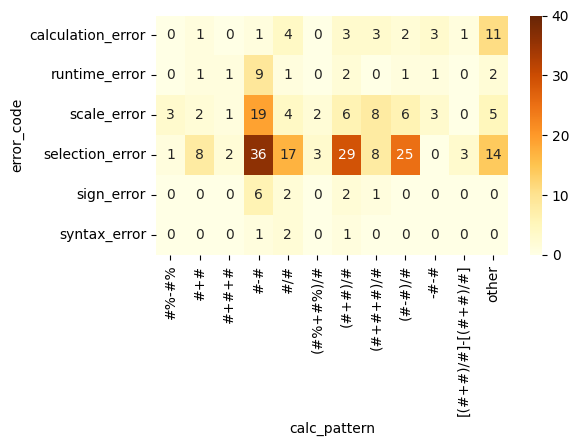

267

In [21]:
df = annotated_results1.query('error_code != "none"')
cga_utils.crosstab_heatmap(df, 'error_code', 'calc_pattern', 40,0,3) 
len(df)

In [42]:
v31 = pd.read_csv('res/e38_31.csv')
cga_utils.compare_results(v31, annotated_results, "qid", "exact_match", ["error_code"]).to_csv('res/comp_v31_v45.csv')


In [16]:
from langchain_core.output_parsers import StrOutputParser
from langchain_core.prompts import ChatPromptTemplate
from langchain.schema import HumanMessage

messages = [("human", "Say Hi! /no_think")]
prompt = ChatPromptTemplate.from_messages(messages)
output_parser = StrOutputParser()
chain = prompt | llm | output_parser
r = chain.invoke({})


In [2]:
import prompt_versions
from fastapi import FastAPI
import os
from fastapi.responses import StreamingResponse
from fastapi.staticfiles import StaticFiles
from fastapi.responses import FileResponse
from fastapi import Request

import asyncio
import json
import ast
import time
import timeit
from pathlib import Path

import cga_utils
import table_convert

app = FastAPI()

from langchain_community.chat_models import ChatOllama
llm = ChatOllama(model="qwen3:4b", temperature = 0.0, top_p = 1, repeat_penalty=1, presence_penalty=0, frequency_penalty=0)  
#agent = CodeGenAgent(llm, "V38")


from langchain_core.output_parsers import StrOutputParser
from langchain_core.prompts import ChatPromptTemplate
from langchain.schema import HumanMessage

messages = [("human", "Say Hi! /no_think")]
prompt = ChatPromptTemplate.from_messages(messages)
output_parser = StrOutputParser()
chain = prompt | llm | output_parser
r = chain.invoke({})
r


'<think>\n\n</think>\n\nHello! How can I assist you today? 😊'

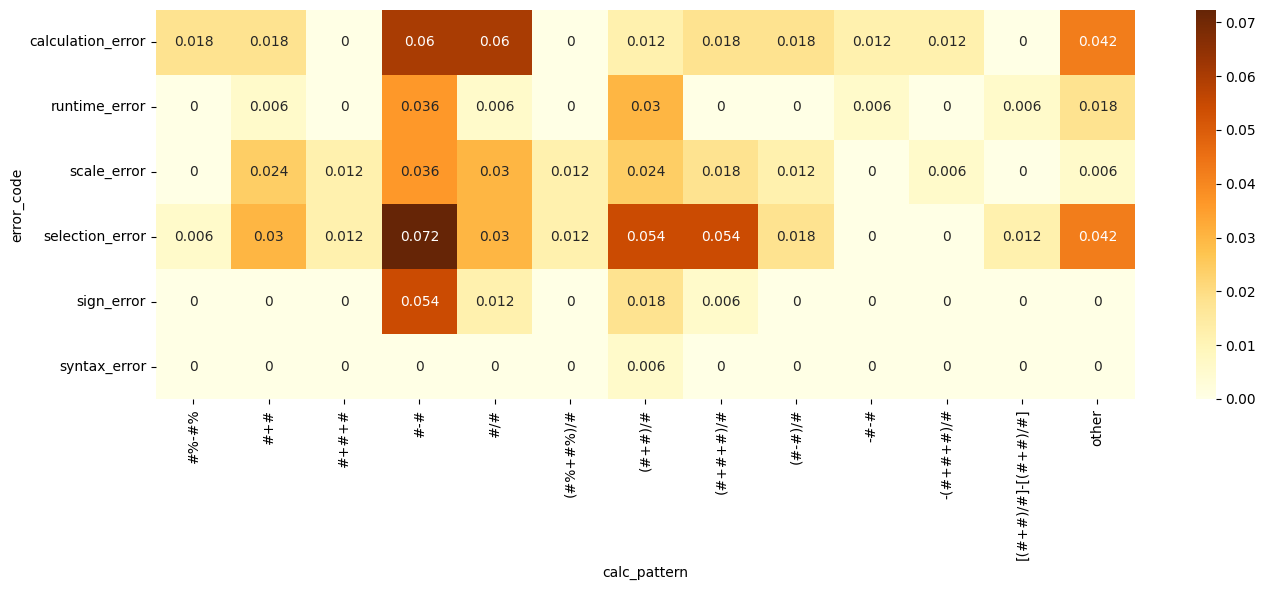

166

In [151]:
df = annotated_results.query('error_code != "none"')
cga_utils.crosstab_heatmap(df, 'error_code', 'calc_pattern', None, 0, 2)
len(df)


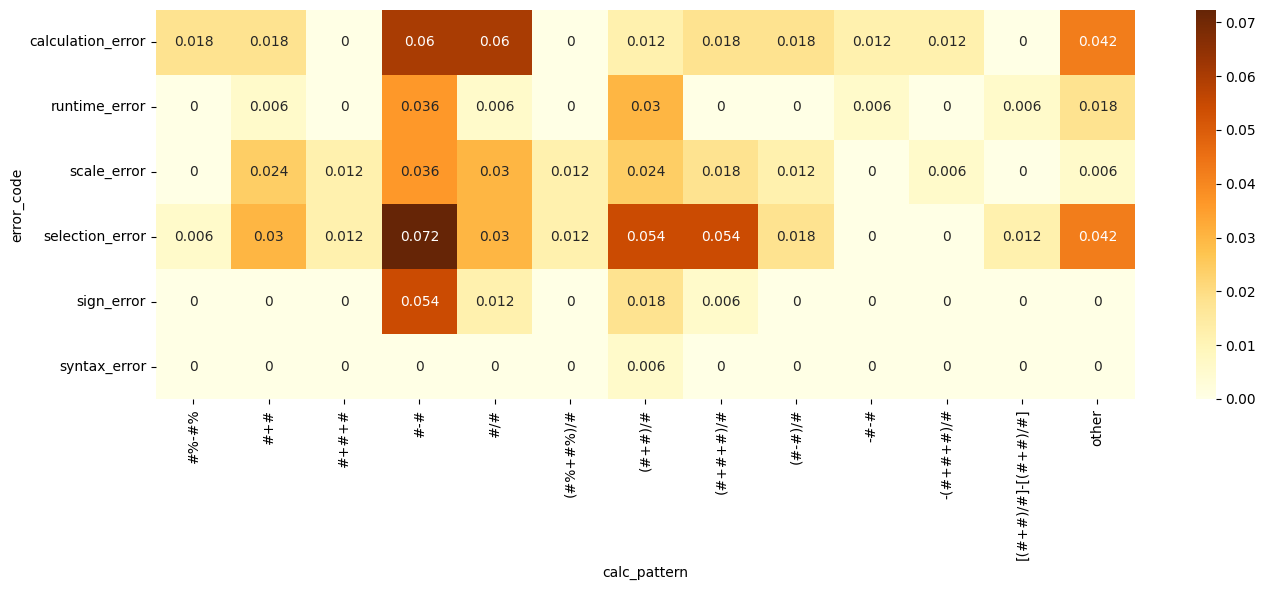

In [148]:
cga_utils.crosstab_heatmap(df, 'error_code', 'calc_pattern', None, 0, 2)

/home/apandy/Tabular/tab_small/cga_utils.py:342: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


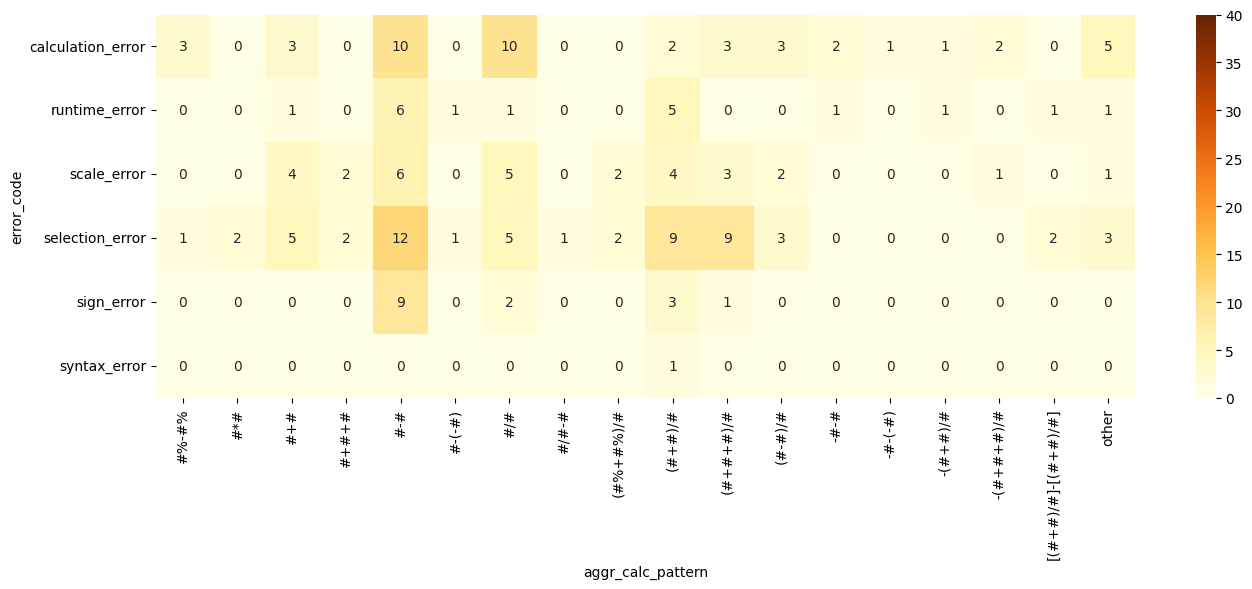

166

In [140]:
df = annotated_results.query('error_code != "none"')
cga_utils.crosstab_heatmap(df, 'error_code', 'aggr_calc_pattern', 40)
len(df)

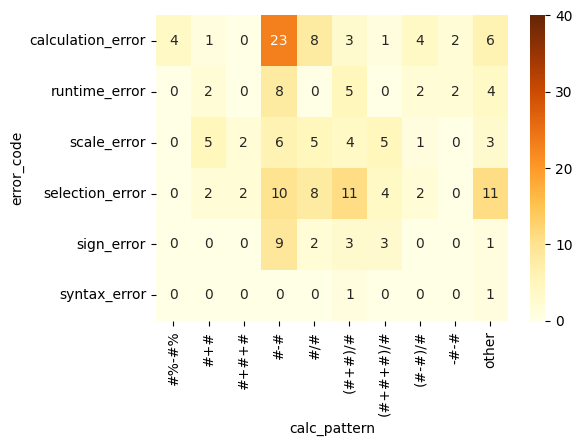

176

In [19]:
df = annotated_results.query('error_code != "none"')
cga_utils.crosstab_heatmap(df, 'error_code', 'calc_pattern', 40,0,3) 
len(df)

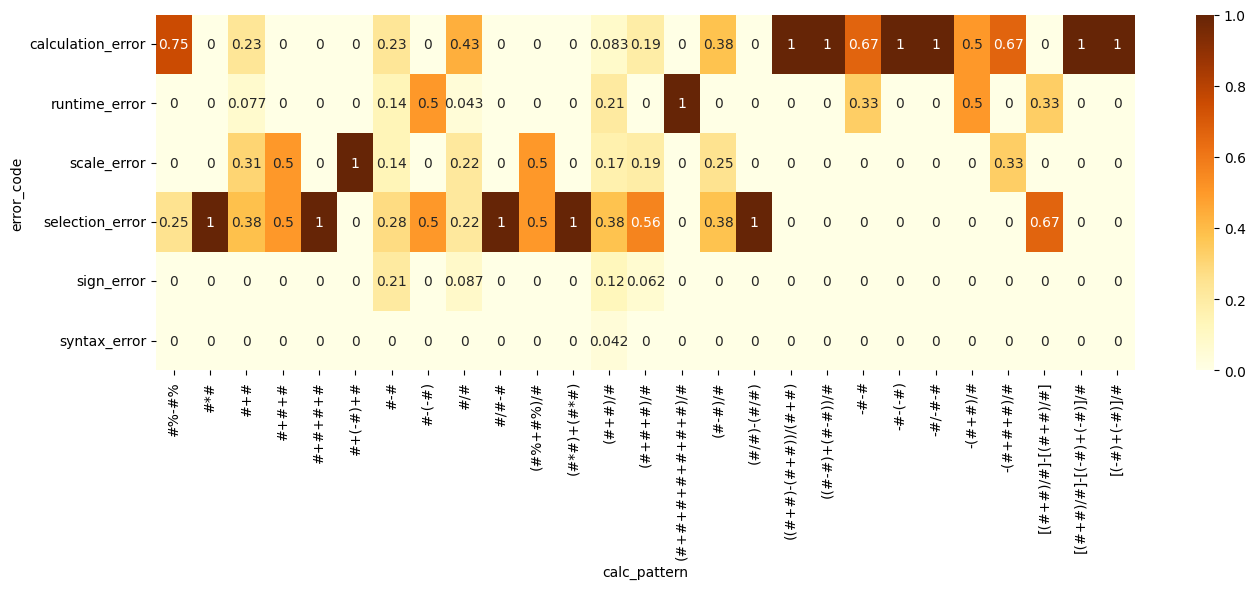

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt
def crosstab_heatmap(df, x, y, vmax=None):
    # 1. Kontingenciatábla
    pattern_error_matrix = pd.crosstab(df[x], df[y], normalize='columns')
    
    # 3. Hőtérkép
    plt.figure(figsize=(14, 6))
    sns.heatmap(pattern_error_matrix, cmap='YlOrBr', vmax=vmax, annot=True )
    
    #plt.title("Hibatípusok előfordulása számítási minták szerint (normalizálva)")
    plt.xlabel(y)
    plt.ylabel(x)
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()
crosstab_heatmap(df, 'error_code', 'calc_pattern')

In [65]:
import re
from collections import Counter

def aggregate_calc_patterns(patterns, replacement="#", other_group_szie=4):

    def merge(text):        
        while (f'{replacement}+{replacement}+{replacement}' in text):
            text = text.replace(f'{replacement}+{replacement}+{replacement}', f'{replacement}+{replacement}')
        return text
    def aggr(text, counts):
        if counts[text] > other_group_szie:
            return text
        else:
            return "other"
    merged = [merge(text) for text in texts]
    counts = Counter(merged)
    aggregated = [aggr(text, counts) for text in texts]
    return aggregated

In [68]:
patterns = cga_utils.replace_numbers(annotated_results['derivation'])
patterns2 = aggregate_calc_patterns(patterns)
set(patterns2)

{'#%-#%',
 '#+#',
 '#-#',
 '#/#',
 '#/#-#',
 '(#%+#%)/#',
 '(#+#)/#',
 '(#-#)/#',
 '-#-#',
 '-(#+#)/#',
 'other'}

Series([], Name: exact_match, dtype: float64)


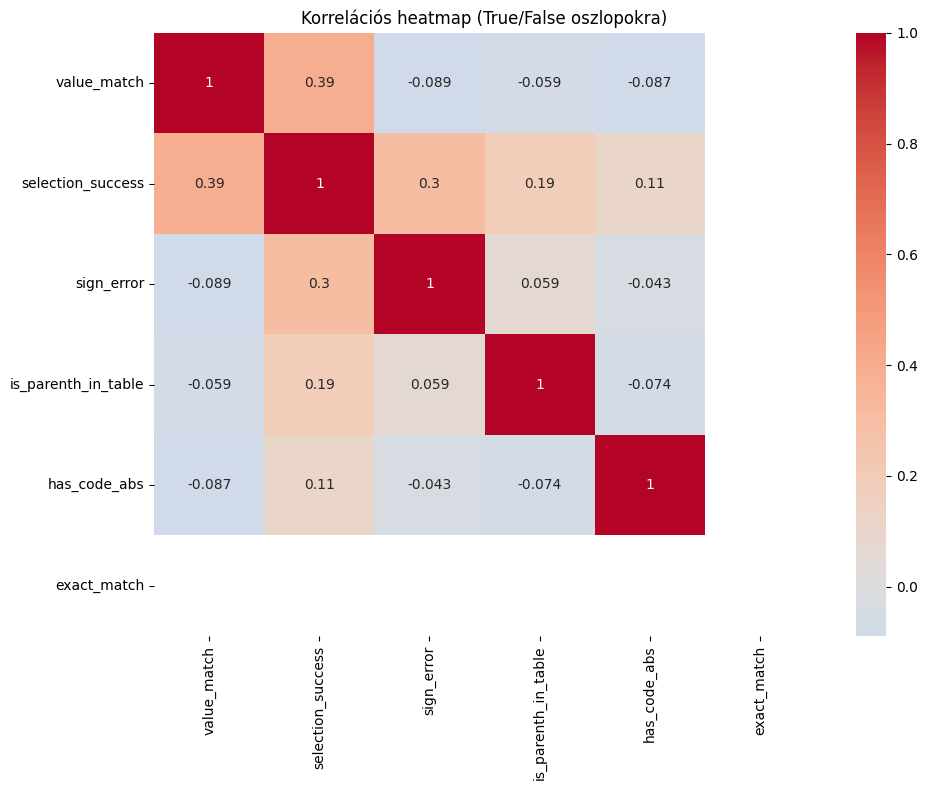

In [44]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = annotated_results.query('error_code != "none"')

# 1. Csak a True/False típusú oszlopokat szűrjük ki
bool_cols = df.select_dtypes(include=['bool'])

# 2. Korrelációs mátrix számítása
corr = bool_cols.corr()
em_corr = bool_cols.corr()['exact_match'].dropna().sort_values(ascending=False)

print(em_corr)

# 3. Heatmap megjelenítés
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap="coolwarm", center=0)

plt.title("Korrelációs heatmap (True/False oszlopokra)")
plt.tight_layout()
plt.show()


In [42]:
bool_cols

,value_match,selection_success,sign_error,is_parenth_in_table,has_code_abs,exact_match
6,False,False,False,False,False,False
8,False,False,False,True,False,False
16,False,False,False,True,False,False
17,False,True,False,True,False,False
22,False,False,False,True,False,False
...,...,...,...,...,...,...
482,False,False,False,True,False,False
484,True,True,False,False,False,False
489,False,True,False,True,False,False
490,False,True,True,True,False,False
